# Key Words of Clusters
19DEC2020<br>
Richard Kuzma and Iain Cruickshank


### Imports

In [1]:
import pandas as pd, numpy as np, pickle, time, re


from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math

In [2]:
from sklearn.decomposition import PCA, KernelPCA

import seaborn as sns
from sklearn.metrics import classification_report, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import SilhouetteVisualizer




In [3]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'pca_2_dim_of_10k_articles_25k_words_with_metadata.pkl'

with open(src_path + save_name, 'rb') as f:
    df = pickle.load(f)
df.head()

,id_str,principal component 1,principal component 2,group,month,retweet_count,favorite_count,Hash words
0,1.220739e+18,-0.095526,-0.040681,4,2020-01,3.0,8.0,#vaccine #vaccine #coronavirus. #wuhan #davos
1,1.220751e+18,-0.098011,-0.113446,4,2020-01,0.0,4.0,No hashtags
2,1.220751e+18,-0.117558,-0.112669,4,2020-01,2.0,2.0,#fightflu:
3,1.220748e+18,-0.113494,-0.000306,1,2020-01,0.0,1.0,#flushotfriday
4,1.220745e+18,-0.113864,-0.098780,4,2020-01,2.0,2.0,#cancer: #hepatitisc #hpv


### Colors

In [4]:
RT_bin_colors = {'0': 'white', 
              '1':'gray', 
              '2':'tab:olive', 
              '3':'lightblue', 
              '4':'green', 
              '5':'red', 
             }
domain_color = {'0': 'red', 
                 '1':'blue', 
                 '2':'yellow', 
                 '3':'gray', 
                 '4':'green'
             }

clusters_color = {'0': 'red', 
                  '1':'blue', 
                  '2':'orange', 
                  '3':'tab:olive', 
                  '4':'lightblue',
                  '5': 'green',
                  '6': 'tab:purple'
                 }


# Plot KMeans Clusters

Score for number of cluster(s) 7: -51.010646942417715
Silhouette score for number of cluster(s) 7: 0.3814511035241243


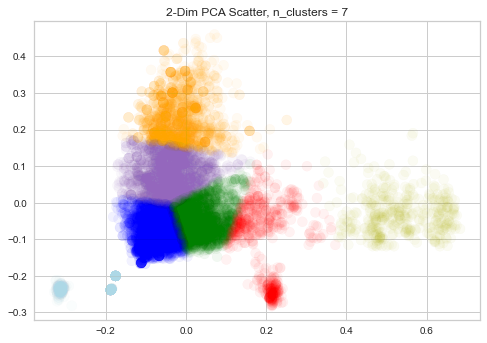

In [5]:
n_clusters = 7
km = KMeans(n_clusters=n_clusters, random_state=42).fit(df.iloc[:, 1:3])
preds = km.predict(df.iloc[:, 1:3])

print("Score for number of cluster(s) {}: {}".format(n_clusters,km.score(df.iloc[:, 1:3])))    

silhouette = silhouette_score(df.iloc[:, 1:3],preds)
print("Silhouette score for number of cluster(s) {}: {}".format(n_clusters,silhouette))

plt.scatter(df.iloc[:, 1], df.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )

plt.title('2-Dim PCA Scatter, n_clusters = 7')
plt.show()

# Add cluster labels as labels

In [6]:
preds_7 = pd.DataFrame(data=preds, columns = ['preds_7'])
df = pd.concat([df, preds_7], axis = 1)
df.head()

,id_str,principal component 1,principal component 2,group,month,retweet_count,favorite_count,Hash words,preds_7
0,1.220739e+18,-0.095526,-0.040681,4,2020-01,3.0,8.0,#vaccine #vaccine #coronavirus. #wuhan #davos,1
1,1.220751e+18,-0.098011,-0.113446,4,2020-01,0.0,4.0,No hashtags,1
2,1.220751e+18,-0.117558,-0.112669,4,2020-01,2.0,2.0,#fightflu:,1
3,1.220748e+18,-0.113494,-0.000306,1,2020-01,0.0,1.0,#flushotfriday,1
4,1.220745e+18,-0.113864,-0.098780,4,2020-01,2.0,2.0,#cancer: #hepatitisc #hpv,1


# Find indexes of closest points to centroids

In [7]:
cluster_centers_pca_7 = km.cluster_centers_
print(type(cluster_centers_pca_7[0]))
print(cluster_centers_pca_7)


<class 'numpy.ndarray'>
[[ 0.19332829 -0.1058103 ]
 [-0.07134648 -0.08179931]
 [-0.01494906  0.23504595]
 [ 0.53452389 -0.03098461]
 [-0.25338227 -0.23099248]
 [ 0.03129741 -0.05073898]
 [-0.04099434  0.07474413]]


In [8]:
def dist_calc(point_1, point_2):
    return abs(np.linalg.norm(point_1 - point_2))

def find_idxs_points_closest_to_centroids(centroid_list, df=df):
    closest_points = []
    closest_idxs = []
    for centroid in centroid_list:
#         print('new centroid: {}'.format(centroid))
        min_dist = 999
        min_idx = -1
        min_point = np.array((999, 999))
        for idx in range(df.shape[0]):
            point = np.array((df.iloc[idx,1], df.iloc[idx,2]))
#             print('idx: {}'.format(idx))
#             print('point: {}'.format(point))
#             print('distance calc ({}, {})'.format(centroid, point))
            dist = dist_calc(centroid, point)
#             print('distance: {}'.format(dist))
            if dist < min_dist:
                min_point = point
#                 print('min_point {}'.format(min_point))
                min_dist = dist
#                 print('min_dist {}'.format(min_dist))
                min_idx = idx
#                 print('min_idx {}'.format(min_idx))
        closest_points.append(min_point)
        closest_idxs.append(min_idx)
#         print('closest_points was {}'.format(closest_points))
#         print('appended {}'.format(min_point))
#         print('closest_idxs was {}'.format(closest_idxs))
#         print('appended {}'.format(min_idx))
#         print('\n')
    return closest_idxs, closest_points
        

def find_index_of_closest_point(closest_points, df=df):
    idxs = []
    for point in closest_points:
        for idx in range(len(df)):
            if (df.iloc[idx,1], df.iloc[idx,2]) == (point[0], point[1]):
                idxs.append(idx)
    return idxs


In [9]:
pseudo_centroid_idxs, pseudo_centroid_points = find_idxs_points_closest_to_centroids(centroid_list = cluster_centers_pca_7)


In [10]:
print(pseudo_centroid_idxs)
print('\n')
print(pseudo_centroid_points)

[8159, 141, 8680, 6111, 8036, 9266, 8405]


[array([ 0.18617508, -0.08846736]), array([-0.07201674, -0.08180601]), array([-0.01437044,  0.23409931]), array([ 0.53020567, -0.03253967]), array([-0.29223274, -0.22817704]), array([ 0.03096179, -0.05073216]), array([-0.04013381,  0.07248294])]


# Plot Pseudo Centroids

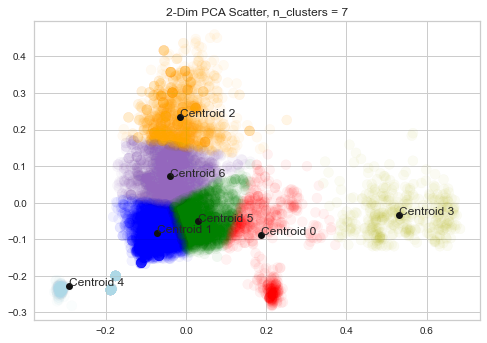

In [11]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('2-Dim PCA Scatter, n_clusters = 7')
plt.show()

# Top Words From Each Centroid

In [15]:
### tweet data
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
tweets_name = 'anti_vax_tweets_urls_articles_labels_10k.pkl'

with open(src_path + tweets_name, 'rb') as f:
    tweets = pickle.load(f)
tweets.head()



,created_at,id_str,entities,user,retweet_count,favorite_count,retweeted_status,Hash words,link,urls,...,news,science,govt,dubious,not_any,news_plus_science,science_plus_dubious,news_plus_dubious,group,month
0,2020-01-24 16:02:16+00:00,1.220739e+18,"{'hashtags': [{'text': 'vaccine', 'indices': [...","{'id': 1929460038, 'id_str': '1929460038', 'na...",3.0,8.0,NaN,#vaccine #vaccine #coronavirus. #wuhan #davos,https://twitter.com/user/status/12207385956628...,[https://www.eurekalert.org/pub_releases/2020-...,...,0,1,0,0,0,1,1,0,4,01
1,2020-01-24 16:52:18+00:00,1.220751e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 339740849, 'id_str': '339740849', 'name...",0.0,4.0,NaN,No hashtags,https://twitter.com/user/status/12207511874791...,[https://www.cdc.gov/mmwr/volumes/68/wr/mm6809...,...,0,1,0,0,0,1,1,0,4,01
2,2020-01-24 16:50:00+00:00,1.220751e+18,"{'hashtags': [{'text': 'FightFlu', 'indices': ...","{'id': 753312146734346240, 'id_str': '75331214...",2.0,2.0,NaN,#fightflu:,https://twitter.com/user/status/12207506089713...,[https://www.cdc.gov/flu/resource-center/index...,...,0,1,0,0,0,1,1,0,4,01
3,2020-01-24 16:40:00+00:00,1.220748e+18,"{'hashtags': [{'text': 'FluShotFriday', 'indic...","{'id': 753318075886338048, 'id_str': '75331807...",0.0,1.0,NaN,#flushotfriday,https://twitter.com/user/status/12207480921835...,[https://go.usa.gov/xVn4Y],...,0,0,1,0,0,0,0,0,1,01
5,2020-01-24 16:26:00+00:00,1.220745e+18,"{'hashtags': [{'text': 'cancer', 'indices': [2...","{'id': 557670851, 'id_str': '557670851', 'name...",2.0,2.0,NaN,#cancer: #hepatitisc #hpv,https://twitter.com/user/status/12207445691861...,[https://www.cdc.gov/cancer/dcpc/prevention/in...,...,0,1,0,0,0,1,1,0,4,01


### Load TFIDF features

In [12]:
# src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
# load_name = 'tfidf_of_10k_articles_25k_words.pkl'

# with open(src_path + load_name, 'rb') as f:
#     tfidf_feat = pickle.load(f)
# tfidf_feat.head()

,id_str,1,2,3,4,5,6,7,8,9,...,24705,24706,24707,24708,24709,24710,24711,24712,24713,24714
0,1.220739e+18,0.0,0.0,0.09676,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.220751e+18,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.220751e+18,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.220748e+18,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.220745e+18,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load Vectorizer

In [13]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'tfidf_vectorizer_after_fit_transform.pkl'

with open(src_path + save_name, 'rb') as f:
    tfidf = pickle.load(f)

### Top Words

In [40]:
idx

8405

In [47]:
feature_array = np.array(tfidf.get_feature_names())
def top_words_from_index(idx, n_words = 15):
    text = tweets.iloc[idx,14]
    tfidf_vals = tfidf.transform([text])
#     print(tfidf_vals.toarray())
#     print(len(tfidf_vals.toarray()[0]))
    sorted_word_idxs = np.argsort(tfidf_vals.toarray()).flatten()[::-1]
    
    top_words = feature_array[sorted_word_idxs][:n_words]
    return top_words

### re-plot

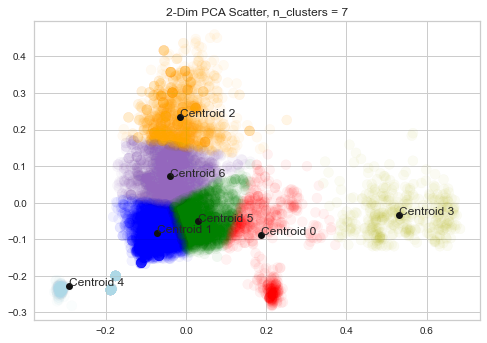

In [50]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('2-Dim PCA Scatter, n_clusters = 7')
plt.show()

### Top Words for each Centroid

In [51]:
n_words = 20
for i, idx in enumerate(pseudo_centroid_idxs):
    print('Centroid: {}'.format(i))
    print('Index: {}'.format(idx))
    print('Top {} Words'.format(n_words))
    print(top_words_from_index(idx, n_words = n_words))
    print('\n')

Centroid: 0
Index: 8159
Top 20 Words
['pence' 'said' 'sunday' 'positivity' 'county' 'yemen' 'hidalgo' 'mr'
 'wear' 'church' 'pride' 'masks' 'cases' 'people' 'houston' 'missouri'
 'states' 'state' 'cards' 'texas']


Centroid: 1
Index: 141
Top 20 Words
['haiti' 'trip' 'traveling' 'travelers' 'cholera' 'malaria' 'travel'
 'doctor' 'dose' 'routine' 'risk' 'medicines' 'bites' 'water' 'need'
 'globulin' 'bugs' 'destination' 'prescription' 'information']


Centroid: 2
Index: 8680
Top 20 Words
['vaccine' 'experimental' 'immune' 'hill' 'got' 'response' 'customizr'
 'aggregating' 'said' 'news' 'effectiveness' 'people' 'dr' 'designed'
 'scientists' 'provoked' 'cells' 'dual' 'destroying' 'produced']


Centroid: 3
Index: 6111
Top 20 Words
['republicans' 'republican' 'mcconnell' 'trump' 'brazilians' 'rio'
 'brazil' 'president' 'vaccine' 'alves' 'right' 'political' 'msnbc'
 'party' 'smallpox' 'covid' 'elites' 'senate' 'police' 'gop']


Centroid: 4
Index: 8036
Top 20 Words
['cache' 'url' 'feeds' 'reut

<br><br><br><br><br><br><br><br><br><br>
# Dubious Domains' Top Words

# Plot KMeans Clusters

In [65]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'pca_2_dim_of_10k_articles_25k_words_with_metadata.pkl'

with open(src_path + save_name, 'rb') as f:
    second_df = pickle.load(f)

In [84]:
dubious = second_df[second_df['group'] == 0]
dubious.reset_index(drop=True, inplace=True)
print(dubious.shape)
dubious.head(3)

(2348, 8)


,id_str,principal component 1,principal component 2,group,month,retweet_count,favorite_count,Hash words
0,1.220738e+18,-0.064132,-0.115679,0,2020-01,0.0,0.0,No hashtags
1,1.220690e+18,0.025275,0.033247,0,2020-01,0.0,1.0,No hashtags
2,1.220621e+18,-0.043605,-0.110501,0,2020-01,3.0,1.0,No hashtags


Score for number of cluster(s) 4: -7.881711556181521
Silhouette score for number of cluster(s) 4: 0.4009877564164898


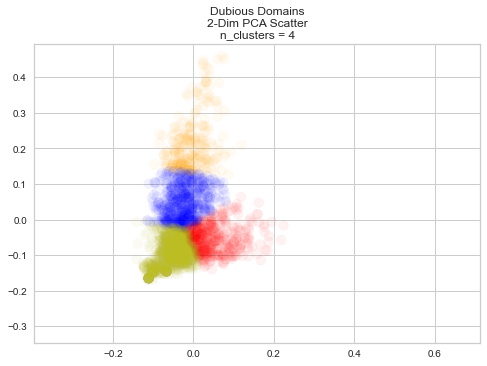

In [85]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=42).fit(dubious.iloc[:, 1:3])
preds = km.predict(dubious.iloc[:, 1:3])

print("Score for number of cluster(s) {}: {}".format(n_clusters,km.score(dubious.iloc[:, 1:3])))    

silhouette = silhouette_score(dubious.iloc[:, 1:3],preds)
print("Silhouette score for number of cluster(s) {}: {}".format(n_clusters,silhouette))

plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)

plt.scatter(dubious.iloc[:, 1], dubious.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )

plt.title('Dubious Domains\n2-Dim PCA Scatter\nn_clusters = {}'.format(n_clusters))
plt.show()

# Add cluster labels as labels

In [86]:
preds_4_dubious = pd.DataFrame(data=preds, columns = ['preds_4_dubious'])
dubious = pd.concat([dubious, preds_4_dubious], axis = 1)


# Find indexes of closest points to centroids

In [87]:
dubious_cluster_centers_4 = km.cluster_centers_
print(type(dubious_cluster_centers_4[0]))
print(dubious_cluster_centers_4)


<class 'numpy.ndarray'>
[[ 0.05088252 -0.05329194]
 [-0.02393212  0.04792134]
 [-0.00281806  0.21856605]
 [-0.05142972 -0.09338451]]


In [88]:
pseudo_centroid_idxs_dubious, pseudo_centroid_points_dubious = find_idxs_points_closest_to_centroids(centroid_list = dubious_cluster_centers_4)


In [89]:
print(pseudo_centroid_idxs_dubious)
print('\n')
print(pseudo_centroid_points_dubious)

[10421, 7410, 6810, 7785]


[array([ 0.04885647, -0.05482314]), array([-0.02567272,  0.04815594]), array([-0.00116892,  0.21947745]), array([-0.05013099, -0.09146366])]


# Plot Pseudo Centroids

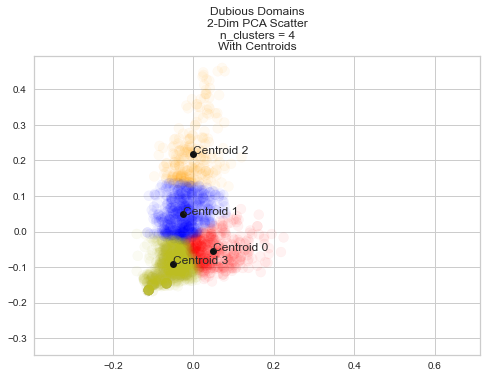

In [92]:
plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)
plt.scatter(dubious.iloc[:, 1], dubious.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points_dubious):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('Dubious Domains\n2-Dim PCA Scatter\nn_clusters = 4\nWith Centroids')
plt.show()

# Top Words From Each Centroid

In [93]:
### tweet data
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
tweets_name = 'anti_vax_tweets_urls_articles_labels_10k.pkl'

with open(src_path + tweets_name, 'rb') as f:
    tweets = pickle.load(f)


### Load TFIDF features

In [94]:
# src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
# load_name = 'tfidf_of_10k_articles_25k_words.pkl'

# with open(src_path + load_name, 'rb') as f:
#     tfidf_feat = pickle.load(f)
# tfidf_feat.head()

## Load Vectorizer

In [95]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'tfidf_vectorizer_after_fit_transform.pkl'

with open(src_path + save_name, 'rb') as f:
    tfidf = pickle.load(f)

### Top Words

In [47]:
feature_array = np.array(tfidf.get_feature_names())
def top_words_from_index(idx, n_words = 15):
    text = tweets.iloc[idx,14]
    tfidf_vals = tfidf.transform([text])
#     print(tfidf_vals.toarray())
#     print(len(tfidf_vals.toarray()[0]))
    sorted_word_idxs = np.argsort(tfidf_vals.toarray()).flatten()[::-1]
    
    top_words = feature_array[sorted_word_idxs][:n_words]
    return top_words

### re-plot

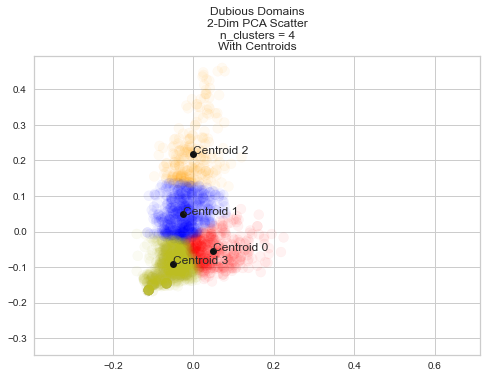

In [97]:
plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)
plt.scatter(dubious.iloc[:, 1], dubious.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points_dubious):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('Dubious Domains\n2-Dim PCA Scatter\nn_clusters = 4\nWith Centroids')
plt.show()

### Top Words for each Centroid

In [99]:
n_words = 50
for i, idx in enumerate(pseudo_centroid_idxs_dubious):
    print('Centroid: {}'.format(i))
    print('Index: {}'.format(idx))
    print('Top {} Words'.format(n_words))
    print(top_words_from_index(idx, n_words = n_words))
    print('\n')

Centroid: 0
Index: 10421
Top 50 Words
['reopen' 'recovery' 'retail' 'schneider' 'week' 'restrictions' 'traffic'
 'unemployment' 'time' 'growth' 'thrown' 'howard' 'pandemic' 'showed'
 'shifts' 'businesses' 'fed' 'said' 'data' 'counts' 'government' 'curve'
 'lifted' 'messages' 'mixed' 'imposed' 'reserve' 'survey' 'economies'
 'july' 'federal' 'wmt' 'illusory' 'punched' 'trust' 'bullard' 'reuters'
 'states' 'plateauing' 'impetus' 'adequacy' 'learning' 'spawned'
 'cellphone' 'com' 'streams' 'slack' 'battled' 'indexes' 'mask']


Centroid: 1
Index: 7410
Top 50 Words
['curevac' 'mrna' 'technology' 'firm' 'germany' 'altmaier' 'modalities'
 'hopp' 'pc' 'future' 'berlin' 'sparked' 'biotech' 'backlash' 'attempts'
 'therapeutic' 'potential' 'holds' 'stake' 'secure' 'german' 'firms'
 'vaccine' 'competitor' 'signalled' 'dietmar' 'sap' 'main' 'company'
 'disruptive' 'tubingen' 'fur' 'brink' 'court' 'employs' 'supply'
 'immense' 'political' 'mr' 'shareholder' 'frankfurt' 'indications'
 'acquisition' '

<br><br><br><br><br><br><br><br><br><br>
# Science Domains' Top Words
<br><br><br>

## Plot KMeans Clusters

In [115]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'pca_2_dim_of_10k_articles_25k_words_with_metadata.pkl'

with open(src_path + save_name, 'rb') as f:
    third_df = pickle.load(f)

In [116]:
science = third_df[third_df['group'] == 4]
science.reset_index(drop=True, inplace=True)
print(science.shape)
science.head(3)

(2274, 8)


,id_str,principal component 1,principal component 2,group,month,retweet_count,favorite_count,Hash words
0,1.220739e+18,-0.095526,-0.040681,4,2020-01,3.0,8.0,#vaccine #vaccine #coronavirus. #wuhan #davos
1,1.220751e+18,-0.098011,-0.113446,4,2020-01,0.0,4.0,No hashtags
2,1.220751e+18,-0.117558,-0.112669,4,2020-01,2.0,2.0,#fightflu:


Score for number of cluster(s) 4: -7.883434644936264
Silhouette score for number of cluster(s) 4: 0.44897374822060654


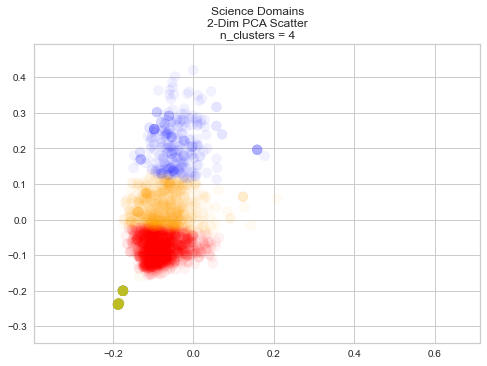

In [117]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=42).fit(science.iloc[:, 1:3])
preds = km.predict(science.iloc[:, 1:3])

print("Score for number of cluster(s) {}: {}".format(n_clusters,km.score(science.iloc[:, 1:3])))    

silhouette = silhouette_score(science.iloc[:, 1:3],preds)
print("Silhouette score for number of cluster(s) {}: {}".format(n_clusters,silhouette))

plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)

plt.scatter(science.iloc[:, 1], science.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )

plt.title('Science Domains\n2-Dim PCA Scatter\nn_clusters = {}'.format(n_clusters))
plt.show()

# Add cluster labels as labels

In [118]:
preds_4_science = pd.DataFrame(data=preds, columns = ['preds_4_science'])
science = pd.concat([science, preds_4_science], axis = 1)


# Find indexes of closest points to centroids

In [119]:
science_cluster_centers_4 = km.cluster_centers_
print(type(science_cluster_centers_4[0]))
print(science_cluster_centers_4)


<class 'numpy.ndarray'>
[[-0.08173539 -0.08180141]
 [-0.04066517  0.21177065]
 [-0.07152494  0.03186257]
 [-0.18199218 -0.22236013]]


In [120]:
pseudo_centroid_idxs_science, pseudo_centroid_points_science = find_idxs_points_closest_to_centroids(centroid_list = science_cluster_centers_4)


In [121]:
print(pseudo_centroid_idxs_science)
print('\n')
print(pseudo_centroid_points_science)

[1437, 621, 4396, 3173]


[array([-0.08212487, -0.07968252]), array([-0.04271343,  0.21341333]), array([-0.07095973,  0.03322309]), array([-0.18414348, -0.23412075])]


# Plot Pseudo Centroids

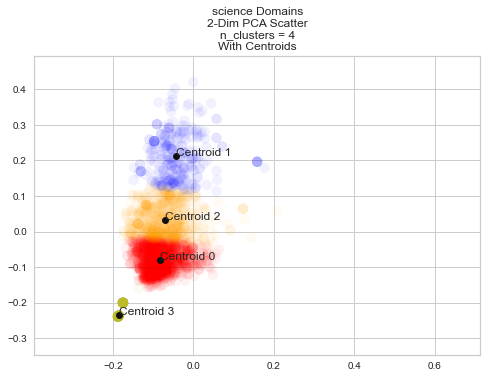

In [122]:
plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)
plt.scatter(science.iloc[:, 1], science.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points_science):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('science Domains\n2-Dim PCA Scatter\nn_clusters = 4\nWith Centroids')
plt.show()

# Top Words From Each Centroid

In [123]:
### tweet data
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
tweets_name = 'anti_vax_tweets_urls_articles_labels_10k.pkl'

with open(src_path + tweets_name, 'rb') as f:
    tweets = pickle.load(f)


### Load TFIDF features

In [124]:
# src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
# load_name = 'tfidf_of_10k_articles_25k_words.pkl'

# with open(src_path + load_name, 'rb') as f:
#     tfidf_feat = pickle.load(f)
# tfidf_feat.head()

## Load Vectorizer

In [125]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'tfidf_vectorizer_after_fit_transform.pkl'

with open(src_path + save_name, 'rb') as f:
    tfidf = pickle.load(f)

### Top Words

In [126]:
feature_array = np.array(tfidf.get_feature_names())
def top_words_from_index(idx, n_words = 15):
    text = tweets.iloc[idx,14]
    tfidf_vals = tfidf.transform([text])
#     print(tfidf_vals.toarray())
#     print(len(tfidf_vals.toarray()[0]))
    sorted_word_idxs = np.argsort(tfidf_vals.toarray()).flatten()[::-1]
    
    top_words = feature_array[sorted_word_idxs][:n_words]
    return top_words

### re-plot

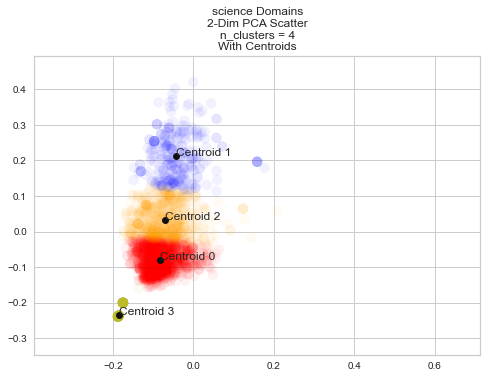

In [128]:
plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)
plt.scatter(science.iloc[:, 1], science.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points_science):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('science Domains\n2-Dim PCA Scatter\nn_clusters = 4\nWith Centroids')
plt.show()

### Top Words for each Centroid

In [129]:
n_words = 50
for i, idx in enumerate(pseudo_centroid_idxs_science):
    print('Centroid: {}'.format(i))
    print('Index: {}'.format(idx))
    print('Top {} Words'.format(n_words))
    print(top_words_from_index(idx, n_words = n_words))
    print('\n')

Centroid: 0
Index: 1437
Top 50 Words
['tier' 'groups' 'pandemic' 'severity' 'targeting' 'persons' 'high'
 'occupational' 'societal' 'level' 'sub' 'highest' 'maintaining' 'supply'
 'functioning' 'healthcare' 'critical' 'ranking' 'pdf' 'pages' 'pregnant'
 'units' 'providers' 'proposed' 'risk' 'vaccine' 'guidance' 'absenteeism'
 'priority' 'balances' 'vaccination' 'stakeholder' 'society' 'checklist'
 'inpatient' 'reinforced' 'women' 'influenza' 'mb' 'included' 'markedly'
 'kb' 'specify' 'cdc' 'illness' 'recognizing' 'email' 'categories'
 'allocation' 'scenarios']


Centroid: 1
Index: 621
Top 50 Words
['johnson' 'vaccine' 'drugmaker' 'icke' 'dosed' 'runner' 'experimental'
 'ready' 'barda' 'viable' 'start' 'books' 'develop' 'cautioned'
 'expanding' 'biomedical' 'testing' 'underway' 'early' 'coronavirus'
 'collaboration' 'make' 'technologies' 'begun' 'research' 'ebola'
 'copyright' 'committed' 'david' 'investment' 'advanced' 'authority'
 'planning' 'fund' 'race' 'september' 'limited' 'patien

<br><br><br><br><br><br><br><br><br><br>
# News Domains' Top Words
<br><br><br>

## Plot KMeans Clusters

In [131]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'pca_2_dim_of_10k_articles_25k_words_with_metadata.pkl'

with open(src_path + save_name, 'rb') as f:
    fourth_df = pickle.load(f)

In [133]:
news = fourth_df[fourth_df['group'] == 2]
news.reset_index(drop=True, inplace=True)
print(news.shape)
news.head(3)

(5819, 8)


,id_str,principal component 1,principal component 2,group,month,retweet_count,favorite_count,Hash words
0,1.220738e+18,0.039053,-0.080700,2,2020-01,2.0,1.0,No hashtags
1,1.220734e+18,0.067652,-0.035149,2,2020-01,1.0,0.0,No hashtags
2,1.220719e+18,-0.003477,-0.118074,2,2020-01,0.0,0.0,No hashtags


Score for number of cluster(s) 5: -45.48082129611254
Silhouette score for number of cluster(s) 5: 0.48227950081179094


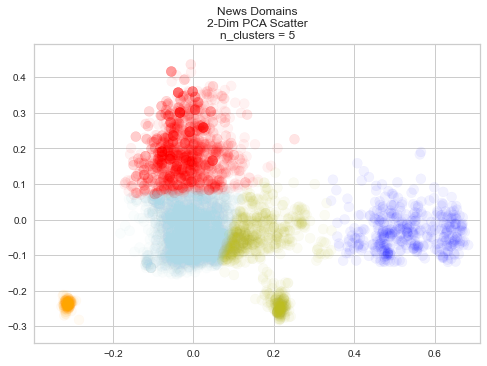

In [142]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters, random_state=42).fit(news.iloc[:, 1:3])
preds = km.predict(news.iloc[:, 1:3])

print("Score for number of cluster(s) {}: {}".format(n_clusters,km.score(news.iloc[:, 1:3])))    

silhouette = silhouette_score(news.iloc[:, 1:3],preds)
print("Silhouette score for number of cluster(s) {}: {}".format(n_clusters,silhouette))

plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)

plt.scatter(news.iloc[:, 1], news.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )

plt.title('News Domains\n2-Dim PCA Scatter\nn_clusters = {}'.format(n_clusters))
plt.show()

# Add cluster labels as labels

In [143]:
preds_5_news = pd.DataFrame(data=preds, columns = ['preds_5_news'])
news = pd.concat([news, preds_5_news], axis = 1)


# Find indexes of closest points to centroids

In [145]:
news_cluster_centers_5 = km.cluster_centers_
print(type(news_cluster_centers_5[0]))
print(news_cluster_centers_5)


<class 'numpy.ndarray'>
[[-0.02249981  0.1928185 ]
 [ 0.53285116 -0.03142955]
 [-0.31287931 -0.23781465]
 [ 0.16837503 -0.09249624]
 [-0.00451089 -0.04042398]]


In [146]:
pseudo_centroid_idxs_news, pseudo_centroid_points_news = find_idxs_points_closest_to_centroids(centroid_list = news_cluster_centers_5)


In [147]:
print(pseudo_centroid_idxs_news)
print('\n')
print(pseudo_centroid_points_news)

[1073, 6111, 6951, 7170, 7161]


[array([-0.02123642,  0.19137103]), array([ 0.53020567, -0.03253967]), array([-0.3116882 , -0.23790279]), array([ 0.16485348, -0.08850433]), array([-0.00490056, -0.03980321])]


# Plot Pseudo Centroids

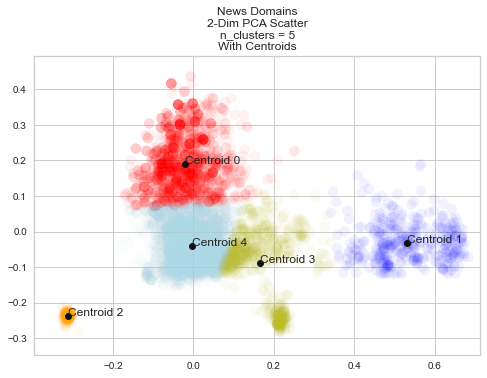

In [149]:
plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)
plt.scatter(news.iloc[:, 1], news.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points_news):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('News Domains\n2-Dim PCA Scatter\nn_clusters = {}\nWith Centroids'.format(n_clusters))
plt.show()

# Top Words From Each Centroid

In [150]:
### tweet data
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
tweets_name = 'anti_vax_tweets_urls_articles_labels_10k.pkl'

with open(src_path + tweets_name, 'rb') as f:
    tweets = pickle.load(f)


### Load TFIDF features

In [151]:
# src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
# load_name = 'tfidf_of_10k_articles_25k_words.pkl'

# with open(src_path + load_name, 'rb') as f:
#     tfidf_feat = pickle.load(f)
# tfidf_feat.head()

## Load Vectorizer

In [152]:
src_path = '/Volumes/seagate_external_drive/anti_vax_embeddings/src/'
save_name = 'tfidf_vectorizer_after_fit_transform.pkl'

with open(src_path + save_name, 'rb') as f:
    tfidf = pickle.load(f)

### Top Words

In [153]:
feature_array = np.array(tfidf.get_feature_names())
def top_words_from_index(idx, n_words = 15):
    text = tweets.iloc[idx,14]
    tfidf_vals = tfidf.transform([text])
#     print(tfidf_vals.toarray())
#     print(len(tfidf_vals.toarray()[0]))
    sorted_word_idxs = np.argsort(tfidf_vals.toarray()).flatten()[::-1]
    
    top_words = feature_array[sorted_word_idxs][:n_words]
    return top_words

### re-plot

#### There's something off about the colors/centroid points here...

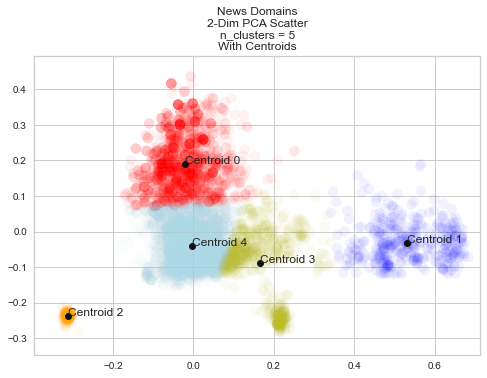

In [156]:
plt.xlim(-0.3968788239417127, 0.7135413537057191)
plt.ylim(-0.3467389663374883, 0.4944272129838014)
plt.scatter(news.iloc[:, 1], news.iloc[:, 2], 
                c = [clusters_color[str(i)] for i in preds],
                alpha=.05,
                s = 100
               )
for i, point in enumerate(pseudo_centroid_points_news):
    plt.plot(point[0], point[1], 'ko')
    plt.annotate('Centroid {}'.format(i), point, )
    


plt.title('News Domains\n2-Dim PCA Scatter\nn_clusters = {}\nWith Centroids'.format(n_clusters))
plt.show()

### Top Words for each Centroid

#### centroid 2 doesn't have understandable words

In [158]:
n_words = 100
for i, idx in enumerate(pseudo_centroid_idxs_news):
    print('Centroid: {}'.format(i))
    print('Index: {}'.format(idx))
    print('Top {} Words'.format(n_words))
    print(top_words_from_index(idx, n_words = n_words))
    print('\n')

Centroid: 0
Index: 1073
Top 100 Words
['astrazeneca' 'trials' 'distribute' 'vaccine' 'shell' 'price' 'bn'
 'soriot' 'centres' 'valuable' 'market' 'oxford' 'share' 'drugmaker'
 'conserve' 'globalisation' 'immunising' 'tumbled' 'value' 'manufacture'
 'anglo' 'teaming' 'company' 'regius' 'giving' 'slashed' 'volunteers'
 'effective' 'deadliest' 'intends' 'acceleration' 'university' 'middle'
 'ftse' 'dutch' 'successful' 'swedish' 'vaccinology' 'highs' 'bell'
 'seeks' 'collapse' 'dividend' 'pascal' 'capabilities' 'joining' 'chadox'
 'sir' 'boosted' 'wed' 'tackle' 'royal' 'jul' 'expertise' 'oil' 'proves'
 'pandemics' 'said' 'cambridge' 'clinical' 'cash' 'prof' 'edt'
 'generation' 'available' 'forces' 'helping' 'ncov' 'aims' 'usual'
 'weather' 'aimed' 'joint' 'collaboration' 'prices' 'human' 'southern'
 'partnership' 'tens' 'announcement' 'preventing' 'aged' 'accelerate'
 'work' 'intended' 'combined' 'modified' 'partners' 'position' 'combat'
 'helped' 'england' 'year' 'adding' 'income' 'distri